*****EMPLOYEE ATTRITION ANALYSIS*****

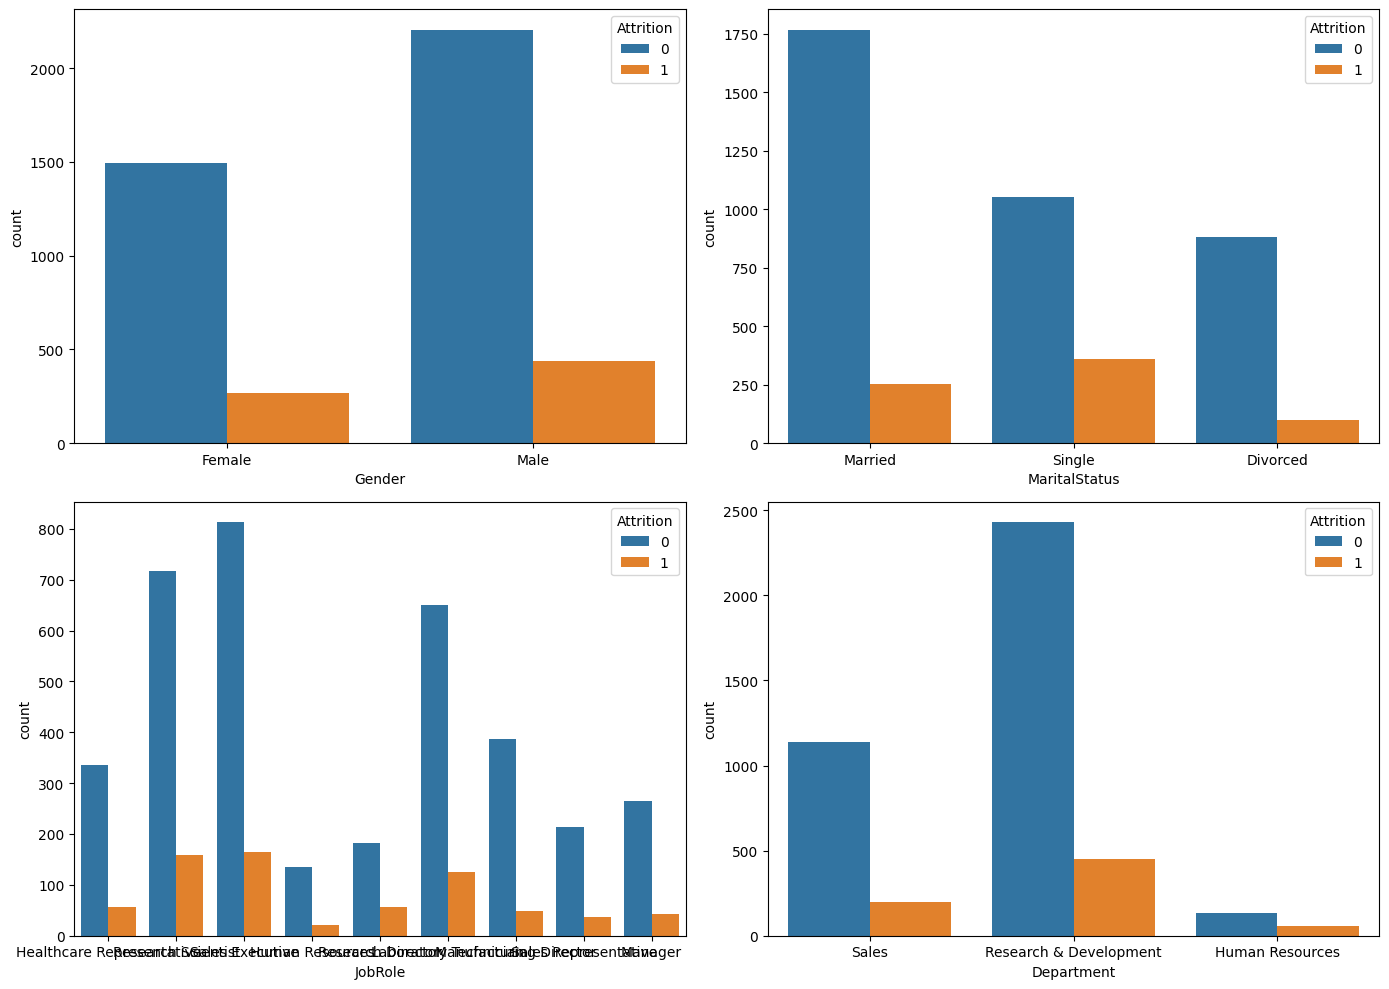

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


data_path = 'Attrituion.csv'  
df = pd.read_csv(data_path)


df.isnull().sum()


df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['StandardHours'] = df['StandardHours'].astype(int)
df['EmployeeCount'] = df['EmployeeCount'].astype(int)


numeric_columns = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_columns].corr()


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='Gender', hue='Attrition', data=df, ax=axes[0, 0])
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, ax=axes[0, 1])
sns.countplot(x='JobRole', hue='Attrition', data=df, ax=axes[1, 0])
sns.countplot(x='Department', hue='Attrition', data=df, ax=axes[1, 1])
plt.tight_layout()


fig_income = px.box(df, x='Attrition', y='MonthlyIncome', points="all", title='Monthly Income vs Attrition')


fig_years = px.box(df, x='Attrition', y='YearsAtCompany', points="all", title='Years at Company vs Attrition')


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),
    
   
    html.Div([
        html.Div([
            dcc.Graph(id='income-attrition', figure=fig_income)
        ], className="six columns"),
        
        html.Div([
            dcc.Graph(id='years-attrition', figure=fig_years)
        ], className="six columns"),
    ], className="row"),
    
  
    html.Div([
        html.H2("Correlation Matrix"),
        dcc.Graph(
            id='correlation-matrix',
            figure={
                'data': [px.imshow(corr_matrix, text_auto=True).data[0]],
                'layout': {
                    'title': 'Correlation Matrix',
                    'height': 600
                }
            }
        )
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
